# Projet : Prédiction du Diabète

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt



## Chargement des données

In [2]:

path = "../data/diabetes.csv"
df = pd.read_csv(path)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Nettoyage

In [3]:

cols_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in cols_zero_invalid:
    df[c] = df[c].replace(0, np.nan)
    df[c] = df[c].fillna(df[c].median())
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Split Train/Test

In [4]:

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Pipeline

In [5]:

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500))
])


## Validation croisée

In [6]:

cv = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = cross_val_score(pipeline, X, y, cv=cv, scoring="roc_auc")
auc_scores.mean(), auc_scores.std()


(np.float64(0.8316145275176539), np.float64(0.01563374770698735))

## Entraînement final

In [7]:

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

auc, f1, cm


(0.82277318640955,
 0.6415094339622641,
 array([[82, 17],
        [21, 34]]))

## Courbe ROC

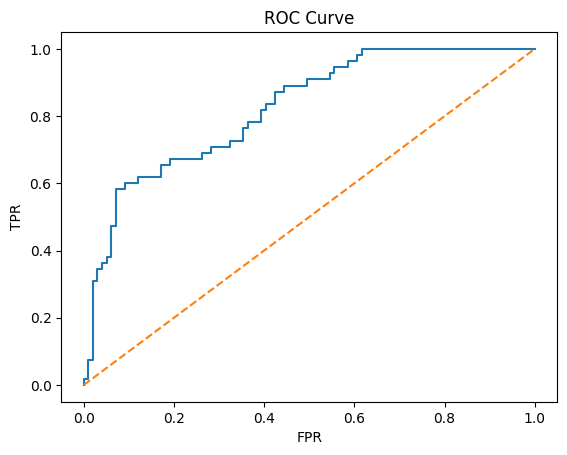

In [8]:

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()


In [9]:
output_path = "../diabete_result.txt"

with open(output_path, "w") as f:
    f.write("AUC Test : " + str(auc) + "\n")
    f.write("F1 Score : " + str(f1) + "\n")
    f.write("Matrice de confusion :\n")
    f.write(str(cm) + "\n")

output_path


'../diabete_result.txt'